# Wekelijkse analyse voor het panel
#### NB: deze analyses moeten elke week opnieuw gerund worden omdat er elke week nieuwe informatie beschikbaar is. De gegevens over jongeren 16-24 en mensen die minstens 1x per week VRT NWS lezen zijn beschikbaar vanaf 21-10-2019.

In [125]:
import pandas as pd 
import os

interessant = pd.read_csv('panel/interessant.csv', sep=';')

## Analyse 1: algemene meest interessante onderwerpen

In [126]:
interessant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55376 entries, 0 to 55375
Data columns (total 7 columns):
datum        55375 non-null object
onderwerp    55375 non-null object
antwoord     55375 non-null object
geslacht     55375 non-null object
leeftijd     55375 non-null object
opleiding    55375 non-null object
vrt_nws      9323 non-null object
dtypes: object(7)
memory usage: 3.0+ MB


In [127]:
algemeen = interessant[['onderwerp', 'antwoord']]

In [128]:
aantal = algemeen.groupby('onderwerp').agg('count')

In [129]:
interes = algemeen[(algemeen.antwoord == 'Heel interessant') | (algemeen.antwoord == 'Eerder interessant')]

In [130]:
interes = interes.groupby('onderwerp').agg('count')

In [131]:
merged = pd.merge(interes, aantal, on='onderwerp', how='left')

In [132]:
merged['percentage'] = merged['antwoord_x'] / merged['antwoord_y'] * 100

In [133]:
merged.percentage = merged.percentage.round(0)

### Tabel: meest interessante onderwerpen

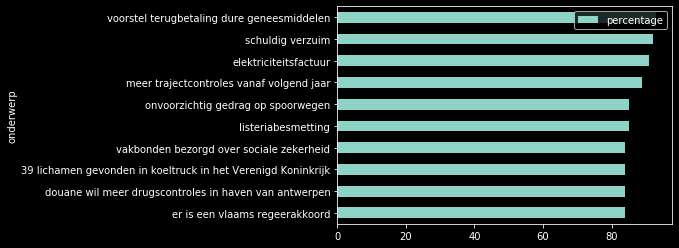

In [134]:
merged.sort_values(by='percentage').tail(10).drop(columns=['antwoord_x', 'antwoord_y']).plot.barh()

### Tabel: minst interessante onderwerpen

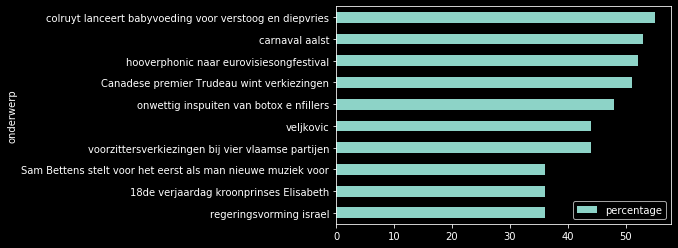

In [135]:
merged.sort_values(by='percentage').head(10).drop(columns=['antwoord_x', 'antwoord_y']).plot.barh()

## Analyse 2: interessante onderwerpen per geslacht

In [136]:
geslacht = interessant[['onderwerp', 'geslacht', 'antwoord']]

In [140]:
geslachten = geslacht.groupby(['onderwerp', 'geslacht']).agg('count')

In [142]:
geslachten_interes = geslacht[(geslacht.antwoord == 'Heel interessant') | (geslacht.antwoord == 'Eerder interessant')]

In [145]:
geslachten_interes = geslachten_interes.groupby(['onderwerp', 'geslacht']).agg('count')

In [147]:
ges_merged = pd.merge(geslachten_interes, geslachten, on=['onderwerp', 'geslacht'], how='left')

In [149]:
ges_merged['percentage'] = ges_merged['antwoord_x'] / ges_merged['antwoord_y'] * 100

In [151]:
ges_merged.percentage = ges_merged.percentage.round(0)

In [162]:
ges_merged = ges_merged.reset_index().set_index('onderwerp')

## Tabel: meest interessante onderwerpen voor mannen

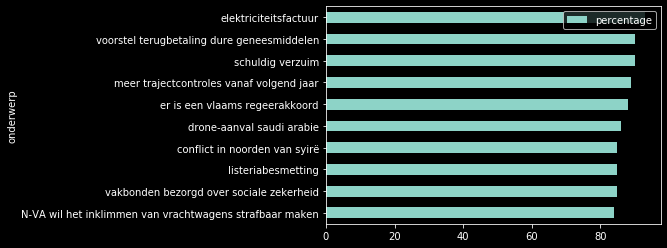

In [165]:
ges_merged[ges_merged.geslacht == 'Man'].sort_values(by='percentage').tail(10).drop(columns=['antwoord_x', 'antwoord_y', 'geslacht']).plot.barh()

## Tabel: meest interessante onderwerpen voor vrouwen

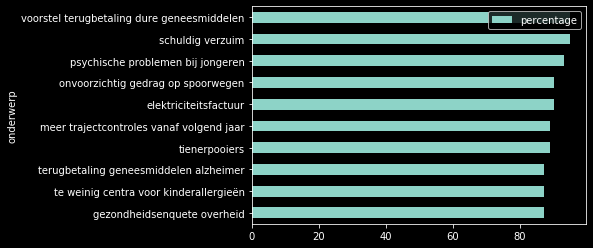

In [166]:
ges_merged[ges_merged.geslacht == 'Vrouw'].sort_values(by='percentage').tail(10).drop(columns=['antwoord_x', 'antwoord_y', 'geslacht']).plot.barh()

## Analyse 3: onderwerpen die 'vooral voor mannen' of 'vooral voor vrouwen' interessant zijn

In [169]:
ges_analyse = ges_merged.reset_index()

In [173]:
verschil = ges_analyse.pivot(index='onderwerp', columns='geslacht', values='percentage').drop(columns=['#NULL!', 'X'])

In [174]:
verschil['verschil'] = verschil['Man'] - verschil['Vrouw']

### Tabel: onderwerpen 'vooral voor vrouwen' interessant

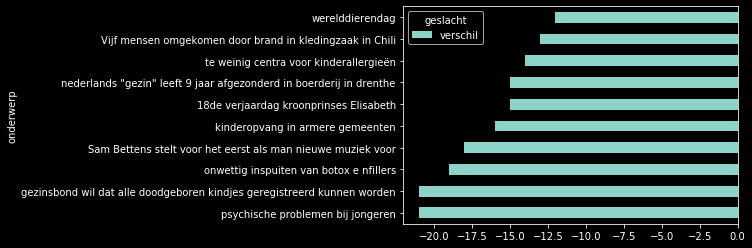

In [183]:
verschil.sort_values(by='verschil').drop(columns=['Man', 'Vrouw']).head(10).plot.barh()

### Tabel: onderwerpen 'vooral voor mannen' interessant

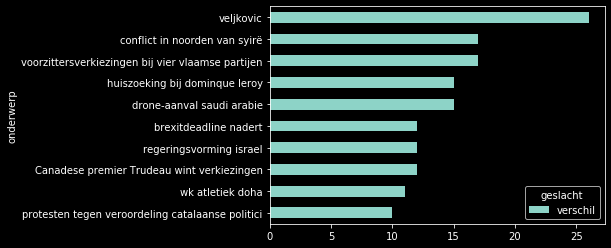

In [184]:
verschil.sort_values(by='verschil').drop(columns=['Man', 'Vrouw']).tail(10).plot.barh()

## Analyse 4: onderwerpen die voor jongeren interessant zijn

In [185]:
jongeren = interessant[['onderwerp', 'leeftijd', 'antwoord']]

In [191]:
count = jongeren.groupby(['onderwerp', 'leeftijd']).agg('count')

In [192]:
jong = jongeren[(jongeren.antwoord == 'Eerder interessant') | (jongeren.antwoord == 'Heel interessant')]

In [195]:
jong = jong.groupby(['onderwerp', 'leeftijd']).agg('count')

In [198]:
jong_merged = pd.merge(jong, count, left_index=True, right_index=True)

In [201]:
jong_merged = jong_merged.reset_index()

In [203]:
jong_merged['percentage'] = jong_merged['antwoord_x'] / jong_merged['antwoord_y'] * 100

In [204]:
jong_merged.percentage = jong_merged.percentage.round(0)

### Tabel: top tien onderwerpen voor jongeren 16-34

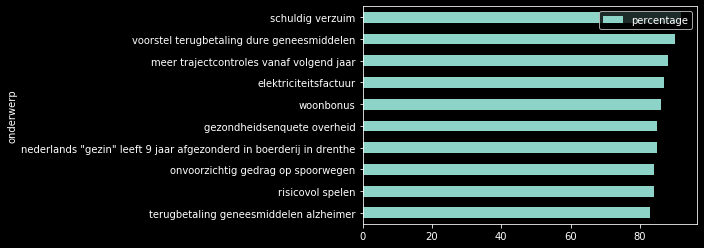

In [209]:
jong_merged[jong_merged.leeftijd == '16-34'].drop(columns=['leeftijd', 'antwoord_x', 'antwoord_y']).sort_values(by='percentage').tail(10).set_index('onderwerp').plot.barh()

### Tabel: top tien onderwerpen voor jongeren 16-24

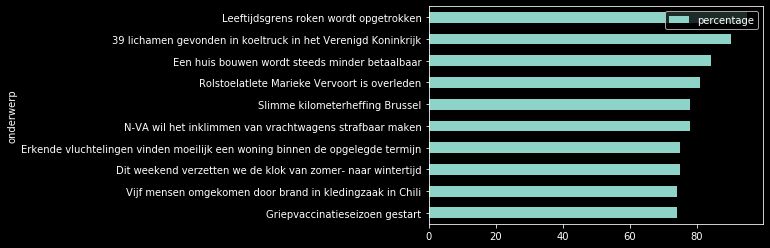

In [210]:
jong_merged[jong_merged.leeftijd == '16-24'].drop(columns=['leeftijd', 'antwoord_x', 'antwoord_y']).sort_values(by='percentage').tail(10).set_index('onderwerp').plot.barh()

## Analyse 5: onderwerpen interessant voor laagopgeleiden

In [211]:
laagopgeleid = interessant[['onderwerp', 'opleiding', 'antwoord']]

In [212]:
aantal_laag = laagopgeleid.groupby(['onderwerp', 'opleiding']).agg('count')

In [213]:
laag = laagopgeleid[(laagopgeleid.antwoord == 'Eerder interessant') | (laagopgeleid.antwoord == 'Heel interessant')]

In [214]:
laag = laag.groupby(['onderwerp', 'opleiding']).agg('count')

In [215]:
laag_merged = pd.merge(laag, aantal_laag, left_index=True, right_index=True)

In [217]:
laag_merged = laag_merged.reset_index()

In [219]:
laag_merged['percentage'] = laag_merged['antwoord_x'] / laag_merged['antwoord_y'] * 100

In [220]:
laag_merged.percentage = laag_merged.percentage.round(0)

### Tabel: onderwerpen vooral interessant voor laagopgeleiden

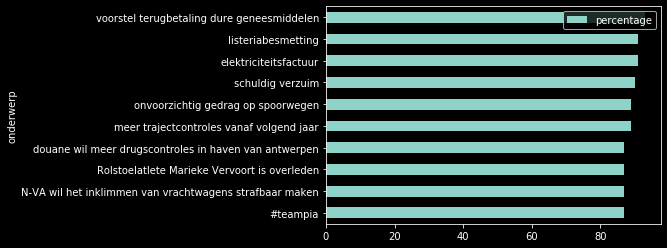

In [223]:
laag_merged[laag_merged.opleiding == 'Hoogstens lager secundair'].drop(columns=['opleiding', 'antwoord_x', 'antwoord_y']).set_index('onderwerp').sort_values(by='percentage').tail(10).plot.barh()

## Analyse 6: onderwerpen interessant voor mensen die minstens 1x per week VRT NWS bekijken

In [224]:
vrtnws = interessant[['onderwerp', 'vrt_nws', 'antwoord']]

In [226]:
vrt_nws_aantal = vrtnws.groupby(['onderwerp', 'vrt_nws']).agg('count')

In [228]:
nws = vrtnws[(vrtnws.antwoord == 'Eerder interessant') | (vrtnws.antwoord == 'Heel interessant')]

In [230]:
nws = nws.groupby(['onderwerp', 'vrt_nws']).agg('count')

In [232]:
merged_nws = pd.merge(nws, vrt_nws_aantal, left_index=True, right_index=True)

In [235]:
merged_nws['percentage'] = merged_nws['antwoord_x'] / merged_nws['antwoord_y'] * 100

In [237]:
merged_nws.percentage = merged_nws.percentage.round(0)

In [239]:
merged_nws = merged_nws.reset_index()

### Tabel: onderwerpen die interessant zijn voor mensen die wekelijks VRTNWS bekijken

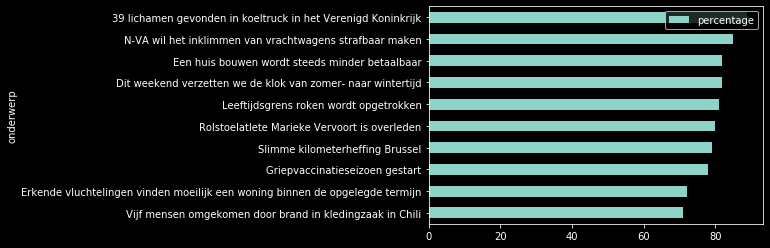

In [243]:
merged_nws[merged_nws.vrt_nws == 'Minstens wekelijks'].drop(columns=['vrt_nws', 'antwoord_x', 'antwoord_y']).set_index('onderwerp').sort_values(by='percentage').tail(10).plot.barh()